<a href="https://colab.research.google.com/github/MuhammadNurulHuda03/Tugas-6/blob/main/Tugas_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import numpy as np
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

num_samples, num_features = X.shape
num_classes = np.unique(y).size

print(f"Total sampel: {num_samples}")
print(f"Fitur per sampel: {num_features}")
print(f"Kelas digit unik: {num_classes}")


Total sampel: 1797
Fitur per sampel: 64
Kelas digit unik: 10


In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def evaluate_kmeans(kmeans, name, data):
    """
    Evaluasi KMeans tanpa label ground truth.

    Parameters:
    - kmeans: instance KMeans
    - name: nama metode
    - data: data input yang akan di-cluster
    """
    t0 = time()
    pipeline = make_pipeline(StandardScaler(), kmeans)
    pipeline.fit(data)
    fit_time = time() - t0
    inertia = pipeline[-1].inertia_

    silhouette = metrics.silhouette_score(
        data, pipeline[-1].labels_, metric='euclidean'
    )

    # Tampilkan hasil
    print(f"{name:<10s} | Waktu: {fit_time:.3f}s | Inertia: {inertia:.0f} | Silhouette: {silhouette:.3f}")


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Baca file CSV (jika belum)
df = pd.read_csv('Mall_Customers.csv')

# Ambil 2 fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Contoh evaluasi dengan inisialisasi berbeda
evaluate_kmeans(KMeans(n_clusters=3, init='k-means++', random_state=42), 'KMeans++', X)
evaluate_kmeans(KMeans(n_clusters=3, init='random', random_state=42), 'Random', X)


KMeans++   | Waktu: 0.054s | Inertia: 158 | Silhouette: 0.468
Random     | Waktu: 0.016s | Inertia: 158 | Silhouette: 0.468


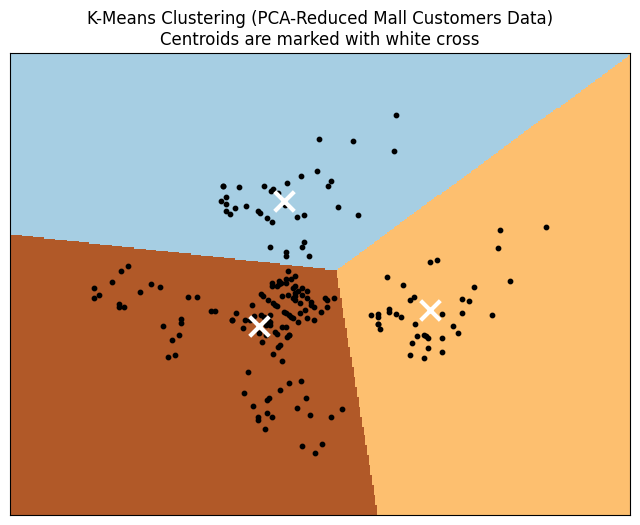

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv("Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduksi dimensi menjadi 2D untuk visualisasi
reduced_data = PCA(n_components=2).fit_transform(X_scaled)

# Jumlah klaster
n_clusters = 3

# Latih model KMeans pada data PCA
kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(reduced_data)

# Ukuran grid untuk plotting
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prediksi label untuk setiap titik di grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Plot titik data asli
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='k', s=10)

# Plot centroid
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=200, linewidths=3,
            color='white', zorder=10)

plt.title("K-Means Clustering (PCA-Reduced Mall Customers Data)\nCentroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks([])
plt.yticks([])
plt.show()
